# Predict Property Values

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# setting gridstyle
sns.set_style(style='whitegrid')

In [3]:
# reading and checking data
df = pd.read_csv('Melbourne_housing_FULL.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


## Data Cleaning

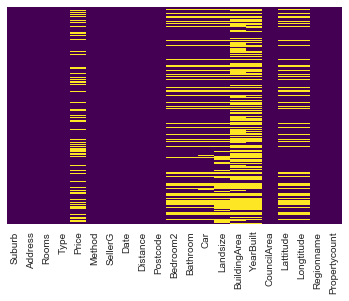

In [6]:
# visualizing null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
# Dropping columns
df.drop(df[['BuildingArea','YearBuilt','Lattitude','Longtitude']], axis=1,inplace=True)

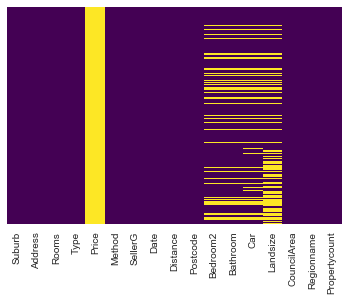

In [8]:
# looking at missing prices more carefully, They all have Room values so we can use that to fill in the missing values
sns.heatmap(df[df['Price'].isnull()].isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
# Finding average price by number of rooms
df.groupby(['Rooms'])['Price'].mean()

Rooms
1     4.331784e+05
2     7.582970e+05
3     1.030794e+06
4     1.376351e+06
5     1.817767e+06
6     1.847449e+06
7     1.787972e+06
8     1.716858e+06
9     1.380000e+06
10    2.018000e+06
12    2.705000e+06
16    5.000000e+06
Name: Price, dtype: float64

In [10]:
# creating a function to fill in missing prices based off of room numbers
def impute_price(cols):
    Price = cols[0]
    Rooms = cols[1]
    
    if pd.isnull(Price):
        
        if Rooms == 1:
            return 433178.43
        elif Rooms == 2:
            return 758296.95
        elif Rooms == 3:
            return 1030794
        elif Rooms == 4:
            return 1376351
        elif Rooms == 5:
            return 1817767
        elif Rooms == 6:
            return 1847449
        elif Rooms == 7:
            return 1787972
        elif Rooms == 8:
            return 1716858
        elif Rooms == 9:
            return 1380000
        elif Rooms == 10:
            return 2018000
        elif Rooms == 12:
            return 2705000
        else:
            return 5000000
    else:
        return Price

In [11]:
# Applying function
df.Price = df[['Price','Rooms']].apply(impute_price, axis=1)

In [12]:
# dropping rows with 3 or more null values
df.dropna(inplace=True, axis=0)

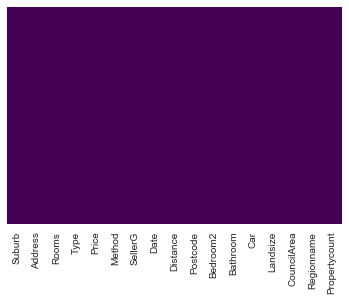

In [13]:
# Ready to take a closer look at the date
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Exploring the Data

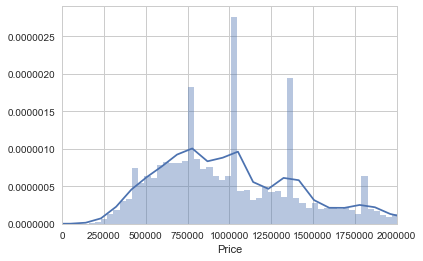

In [14]:
# checking distribution of target value
sns.distplot(df['Price'],bins=300)
plt.xlim(0,2000000)
plt.show()

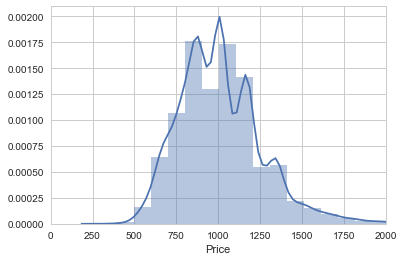

In [95]:
# better distribution
sns.distplot(np.sqrt(df['Price']),bins=30)
plt.xlim(0,2000)
plt.show()

In [79]:
df['sqrt_price'] = np.sqrt(df['Price'])

In [15]:
# Looking at numerical columns averages, mins, ma
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Propertycount
count,20366.000000,2.036600e+04,20366.000000,20366.000000,20366.000000,20366.000000,20366.000000,20366.000000,20366.000000
mean,3.056123,1.091840e+06,10.786900,3112.608220,3.035549,1.601296,1.679073,586.033929,7483.156437
std,0.971756,5.949369e+05,6.494625,102.721294,0.998655,0.729597,1.005422,3533.231302,4333.310414
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,83.000000
25%,2.000000,7.100000e+05,6.400000,3047.000000,2.000000,1.000000,1.000000,210.000000,4407.000000
50%,3.000000,1.000000e+06,9.700000,3102.000000,3.000000,1.000000,2.000000,505.000000,6567.000000
75%,4.000000,1.376351e+06,13.800000,3150.000000,4.000000,2.000000,2.000000,668.000000,10331.000000
max,12.000000,1.120000e+07,48.100000,3977.000000,30.000000,12.000000,26.000000,433014.000000,21650.000000


In [16]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,758296.95,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,Yarra City Council,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra City Council,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra City Council,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,1030794.00,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,Yarra City Council,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra City Council,Northern Metropolitan,4019.0


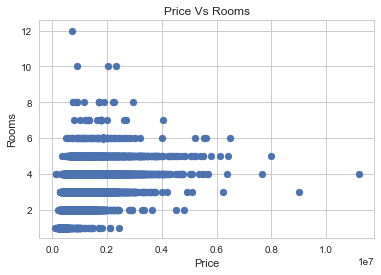

In [22]:
plt.scatter(df['Price'], df['Rooms'])
plt.title('Price Vs Rooms')
plt.xlabel('Price')
plt.ylabel('Rooms')
plt.show()

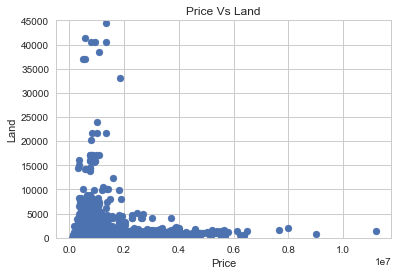

In [26]:
plt.scatter(df['Price'],df['Landsize'])
plt.title('Price Vs Land')
plt.xlabel('Price')
plt.ylabel('Land')
plt.ylim(0, 45000)
plt.show()

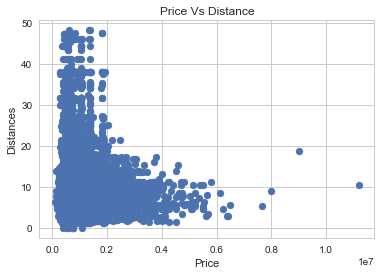

In [28]:
plt.scatter(df['Price'],df['Distance'])
plt.title('Price Vs Distance')
plt.xlabel('Price')
plt.ylabel('Distances')
plt.show()

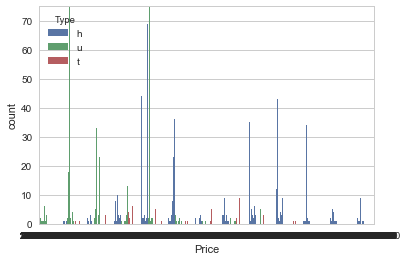

In [31]:
sns.countplot("Price", data=df, hue='Type')
plt.ylim(0,75)
plt.show()

## Setting Up Features

In [32]:
# see how many variables to make dummies
df.Method.unique()

array(['SS', 'S', 'VB', 'SP', 'PI', 'SN', 'W', 'PN', 'SA'], dtype=object)

In [33]:
# see how many variables to make dummies
df.Regionname.unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'], dtype=object)

In [40]:
# way to many unique values
df.SellerG.nunique()

326

In [41]:
df.Suburb.nunique()

332

In [35]:
# importing libs
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_predict
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression

In [36]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'CouncilArea', 'Regionname', 'Propertycount'],
      dtype='object')

In [80]:
X = df[['Rooms', 'Type', 'Method','Distance', 
       'Postcode', 'Bedroom2', 'Bathroom', 'Car','Landsize',
       'CouncilArea', 'Regionname', 'Propertycount','sqrt_price']]

In [81]:
X = pd.get_dummies(X)
y = df['Price']

In [82]:
# splitting data into test and training group
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [83]:
lr = LinearRegression()

In [84]:
# Train model
Lr = lr.fit(X_train, y_train)
 
# Predict on training set
cross_val_score(Lr, X, y, cv= 6)

array([ 0.97631326,  0.96815572,  0.96331754,  0.9670531 ,  0.96348081,
        0.95911283])

In [85]:
Lr.score(X, y)

0.96744998207396349

## RFE

### importing Libraries

In [141]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest

In [98]:
# See all feature ranks
nfeatures = 1

In [99]:
# Setting Up Selector
rfe = RFE(lr,nfeatures)

In [100]:
# Fitting rfe
fit = rfe.fit(X,y)

In [101]:
# Display of Features Importants
result_RFE = pd.DataFrame(list(fit.ranking_),index=X.columns)

In [102]:
# saving copy of ranked features
sorted_rfe = result_RFE[0].sort_values()

In [103]:
sorted_rfe.head(5)

Type_h       1
Type_t       2
Type_u       3
Method_VB    4
Method_PI    5
Name: 0, dtype: int64

In [179]:
# setting up K-best to see P-Values
kbest = SelectKBest().fit(X,y)

In [180]:
# Putting results in a Dataframe
result_kb = pd.DataFrame(kbest.score_func(X,y)[1],index=X.columns)

In [182]:
# printing the P-Values for features
result_kb[0].sort_values().head(10)

Rooms                                   0.000000e+00
Bedroom2                                0.000000e+00
Bathroom                                0.000000e+00
Type_u                                  0.000000e+00
sqrt_price                              0.000000e+00
Type_h                                  0.000000e+00
Method_S                               2.512251e-306
Regionname_Southern Metropolitan       2.243848e-198
CouncilArea_Boroondara City Council    2.018600e-181
Car                                     7.756877e-83
Name: 0, dtype: float64

## Applying PCA

In [104]:
# standardizing data
ss = StandardScaler().fit_transform(X_train)

In [109]:
# using pca to select 4 components from our 60 plus remaining features
sklearn_pca = PCA(n_components=4)

# fitting our x training data to pca
Y_sklearn = sklearn_pca.fit_transform(X_PCA)

# adding results to a new data frame
X_PCA = pd.DataFrame(Y_sklearn)

## Re-Fitting Linear Regression Model With Components

In [111]:
LR = lr.fit(X_PCA, y_train)

In [112]:
cross_val_score(LR, X, y, cv= 5)

array([ 0.97547837,  0.96557407,  0.96565618,  0.96122201,  0.96144089])

### LR  Analysis

This model fits this type of data really well because it is able to calculate y values from a changing X.  With a feature like the square root of the price in the model it is able to that to predict Y

## Random Forest Model

In [115]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.grid_search import GridSearchCV

In [116]:
RFR = RandomForestRegressor()

In [117]:
# creating parameters to test
param_grid = {'n_estimators':[10,25,50,75,100,125,150,175,200,300,400,500]}

In [119]:
# fitting grid with setting
grid = GridSearchCV(RFR,param_grid,verbose=3)

In [121]:
# best parameter
grid.best_params_

{'n_estimators': 500}

In [124]:
grid.best_score_

0.820064306549442

### Analysis of Random Forest Regression

I dont think this is a good model for this type of data because it is hard to come to a binary solution using most of the categories. For example a 3 room house can range from a couple hundred thousand to over a million causing the estimators to have more variance.

## KNN Model

In [125]:
from sklearn.neighbors import KNeighborsRegressor

In [126]:
KNN = KNeighborsRegressor()

In [127]:
param_grid = {'n_neighbors':[1,3,5,10,15,20,25,30,40,50,75,100],
              'weights':['uniform','distance']}

In [128]:
# setting grid search with model and params to test
grid = GridSearchCV(KNN,param_grid,verbose=3)

In [130]:
grid.best_params_

{'n_neighbors': 10, 'weights': 'distance'}

In [131]:
grid.best_score_

0.8056722311648997

### Analysis for KNN Model

I thought this model would preform better then it did.  Using multiple categories to group similar houses together.  But as I said for the model before I think it causes a lot of problems trying to cluster categories with so much varance.

## SVM

In [132]:
from sklearn.svm import SVR

In [134]:
svr = SVR()

In [135]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [137]:
# setting grid search with model and params to test
grid = GridSearchCV(svr,param_grid,verbose=3)

In [139]:
grid.best_params_

{'C': 1000, 'gamma': 0.1}

In [140]:
grid.best_score_

0.4045182836306787

### Analysis for SVM Model

The support vector regressor model struggle greatly with this dataset. I think its because the types of features use with the model.  SVMs are good at handling a lot of numerical features, but a lot of these features were binary and didn't not create much 'distance' for the model to work with.   

# Conclusion

Overall I think with was a pretty difficult dataset to get accurate predictions off of.  While exploring the data and how the features corrilated with the price category it was clear that most the relationships were pretty scattered and far from linear.  One thing, I was able to do was add the square root feature to give the linear regression model something to work with.  However, the other model still struggled to predicting the target variable with the current features.